## Assignment 3: $k$ Nearest Neighbor

`! git clone https://github.com/ds3001f25/knn_assignment.git`

**Do two questions in total: "Q1+Q2" or "Q1+Q3"**


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

In [ ]:
#I did Q1 and Q2.
#1
#Regression is predicting a numeric outcome while classification is predicting a categorical outcome.

#2
#A confusion table is a cross tabulation of predicted and actual values. It helps us understand whether a model has done well or poorly.

#3
#The SSE quantifies the sum of squared error of a particular model. We use SSE to aggregrate the squared errors into a single metric of fit.

#4
#Overfitting is when your model is too complex to reliably explain the interested phenomenon. Underfitting is when your model is too simple
#to reliably explain the interested phenomenon.

#5
#By splitting the data, we are substituting uncertainty about future predictions for uncertainty about the hold-out data and testing the model.
#Choosing k by evaluatign accuracy or the SSE helps us figure out how far the predicted values are from the true values.

#6
#The strengths of reporting a class label as a prediction is that it is easy to interpret and it is directly usable but you lose a lot of nuance.
#Reporting a class label as a probability distribution captures uncertainty and is more flexible but is harder to interpret.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   Unnamed: 0  price      brand    model  year   title_status  mileage  \
0           0   6300     toyota  cruiser  2008  clean vehicle   274117   
1           1   2899       ford       se  2011  clean vehicle   190552   
2           2   5350      dodge      mpv  2018  clean vehicle    39590   
3           3  25000       ford     door  2014  clean vehicle    64146   
4           4  27700  chevrolet     1500  2018  clean vehicle     6654   

    color                  vin        lot       state country      condition  
0   black    jtezu11f88k007763  159348797  new jersey     usa   10 days left  
1  silver    2fmdk3gc4bbb02217  166951262   tennessee     usa    6 days left  
2  silver    3c4pdcgg5jt346413  167655728     georgia     usa    2 days left  
3    blue    1ftfw1et4efc23745  167753855    virginia     usa  22 hours left  
4     red    3gcpcrec2jg473991  167763266     florida     usa  22 hours left  
(2499, 13)
      Unnamed: 0  price  brand  model   year  title_status  mileage  c

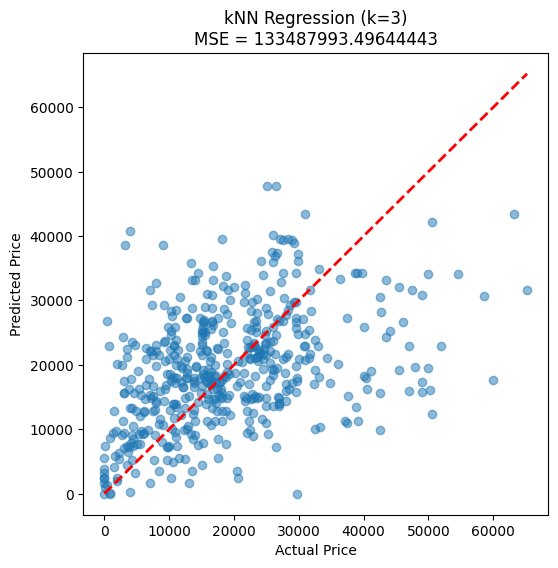

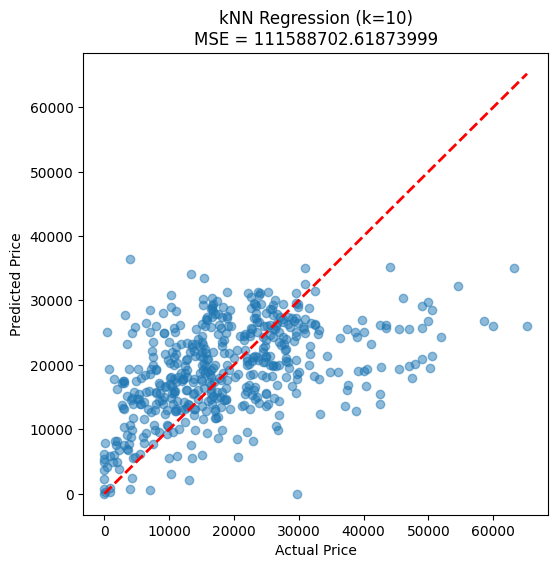

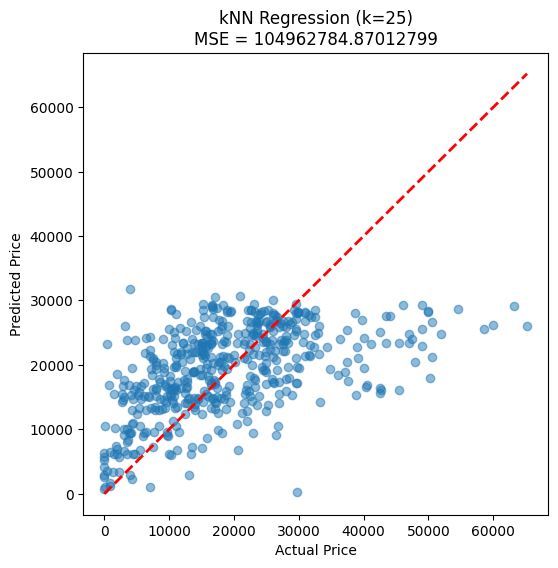

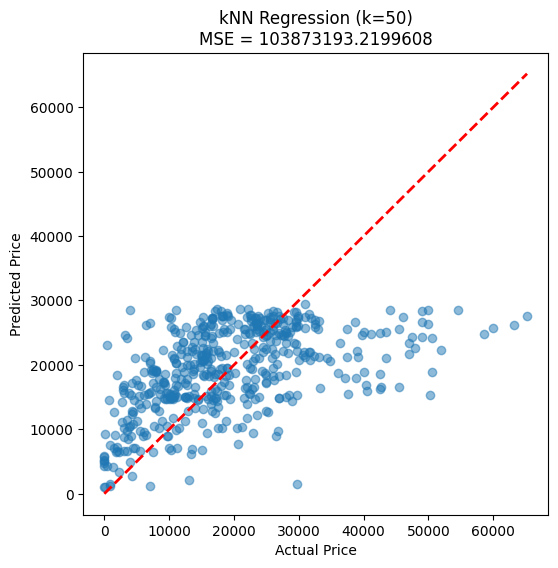

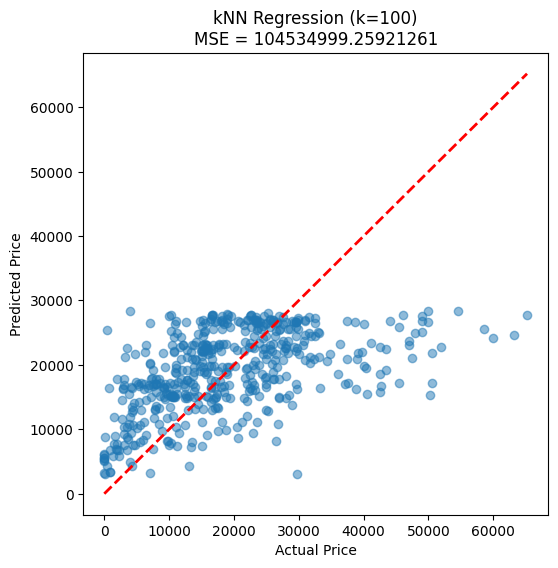

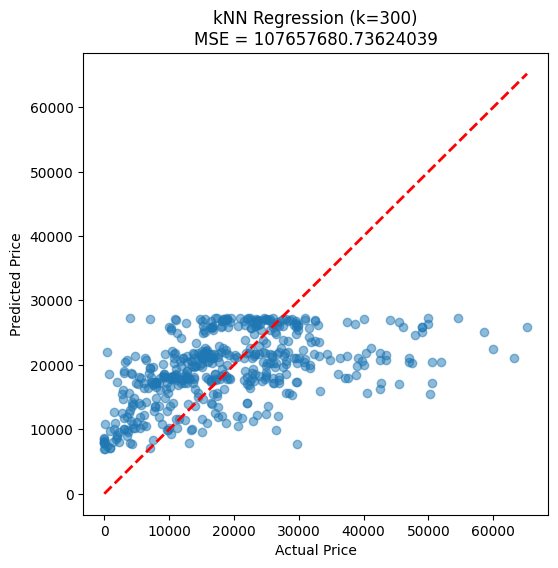

k, MSE:
k=3: MSE=133487993.49644443
k=10: MSE=111588702.61873999
k=25: MSE=104962784.87012799
k=50: MSE=103873193.2199608
k=100: MSE=104534999.25921261
k=300: MSE=107657680.73624039


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#1
cars_df = pd.read_csv('USA_cars_datasets.csv')
cars_df.drop(['price', 'year', 'mileage'], axis = 1)
print(cars_df.head())
print(cars_df.shape) #dimensions: (2499,13)
print(cars_df.isna()) #No

#2
def maxmin(z):
    z = (z-min(z))/(max(z)-min(z))
    return(z)
cars_df[['year', 'mileage']] = cars_df[['year', 'mileage']].apply(maxmin)
print(cars_df.head())

#3
X = cars_df[['year', 'mileage']]
y = cars_df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=65)

#4
k_values = [3, 10, 25, 50, 100, 300]

results = {}

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    results[k] = mse

    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             'r--', lw=2)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"kNN Regression (k={k})\nMSE = {mse}")
    plt.show()

print("k, MSE:")
for k, mse in results.items():
    print(f"k={k}: MSE={mse}")

#As you increase k it gets lower.

#5
#The optimal k for these data is 50, since it produces the lowest mean squared error on the test set.

#6
#For small k like 3, predictions were very close to individual training points, showing overfitting. As
#k increased like 25-50, predictions smoothed out and matched actual prices better. For large
#k like 100-300, predictions clustered near the mean, showing underfitting.




**Q3.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.